In [110]:
import pandas as pd
df = pd.read_csv(r'D:\Test Project\Smart Farming Project\data\raw\Smart_Farming_Crop_Yield_2024.csv') 
print(df.head())

    farm_id       region crop_type  soil_moisture_%  soil_pH  temperature_C  \
0  FARM0001  North India     Wheat            35.95     5.99          17.79   
1  FARM0002    South USA   Soybean            19.74     7.24          30.18   
2  FARM0003    South USA     Wheat            29.32     7.16          27.37   
3  FARM0004  Central USA     Maize            17.33     6.03          33.73   
4  FARM0005  Central USA    Cotton            19.37     5.92          33.86   

   rainfall_mm  humidity_%  sunlight_hours irrigation_type  ... sowing_date  \
0        75.62       77.03            7.27             NaN  ...  2024-01-08   
1        89.91       61.13            5.67       Sprinkler  ...  2024-02-04   
2       265.43       68.87            8.23            Drip  ...  2024-02-03   
3       212.01       70.46            5.03       Sprinkler  ...  2024-02-21   
4       269.09       55.73            7.93             NaN  ...  2024-02-05   

   harvest_date total_days yield_kg_per_hectare  s

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   farm_id               500 non-null    object 
 1   region                500 non-null    object 
 2   crop_type             500 non-null    object 
 3   soil_moisture_%       500 non-null    float64
 4   soil_pH               500 non-null    float64
 5   temperature_C         500 non-null    float64
 6   rainfall_mm           500 non-null    float64
 7   humidity_%            500 non-null    float64
 8   sunlight_hours        500 non-null    float64
 9   irrigation_type       350 non-null    object 
 10  fertilizer_type       500 non-null    object 
 11  pesticide_usage_ml    500 non-null    float64
 12  sowing_date           500 non-null    object 
 13  harvest_date          500 non-null    object 
 14  total_days            500 non-null    int64  
 15  yield_kg_per_hectare  5

In [112]:
date_cols = ['sowing_date', 'harvest_date','timestamp']

In [113]:
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [114]:
df.isnull().sum()

farm_id                   0
region                    0
crop_type                 0
soil_moisture_%           0
soil_pH                   0
temperature_C             0
rainfall_mm               0
humidity_%                0
sunlight_hours            0
irrigation_type         150
fertilizer_type           0
pesticide_usage_ml        0
sowing_date               0
harvest_date              0
total_days                0
yield_kg_per_hectare      0
sensor_id                 0
timestamp                 0
latitude                  0
longitude                 0
NDVI_index                0
crop_disease_status     130
dtype: int64

In [115]:
df['irrigation_type'].unique()

array([nan, 'Sprinkler', 'Drip', 'Manual'], dtype=object)

In [116]:
df['crop_disease_status'].unique()

array(['Mild', nan, 'Severe', 'Moderate'], dtype=object)

Replace Missing Values using KNN method to avoid information  loss.

In [120]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [118]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols
#categorical_cols = ['irrigation_type', 'crop_disease_status','farm_id','region','crop_type','fertilizer_type','sensor_id']

Index(['farm_id', 'region', 'crop_type', 'irrigation_type', 'fertilizer_type',
       'sensor_id', 'crop_disease_status'],
      dtype='object')

In [122]:
numerical_cols = df.select_dtypes(include='number').columns

In [119]:
label_encoders = {}  
encoded_df = df.copy()

In [121]:
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    encoded_df[col] = df[col].astype(str).replace('nan', np.nan)
    non_missing = encoded_df[col].notna()
    label_encoders[col].fit(encoded_df.loc[non_missing, col])
    encoded_df.loc[non_missing, col] = label_encoders[col].transform(encoded_df.loc[non_missing, col])
    encoded_df[col] = encoded_df[col].where(non_missing, np.nan)

In [124]:
imputation_cols = list(numerical_cols) + list(categorical_cols)
X = encoded_df[imputation_cols]


In [126]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
X_imputed = imputer.fit_transform(X)

In [127]:
X_imputed_df = pd.DataFrame(X_imputed, columns=imputation_cols)

In [128]:
for col in categorical_cols:
    X_imputed_df[col] = X_imputed_df[col].round().astype(int)
    X_imputed_df[col] = label_encoders[col].inverse_transform(X_imputed_df[col])

In [129]:
df[categorical_cols] = X_imputed_df[categorical_cols]

In [134]:
df.isnull().sum()

farm_id                 0
region                  0
crop_type               0
soil_moisture_%         0
soil_pH                 0
temperature_C           0
rainfall_mm             0
humidity_%              0
sunlight_hours          0
irrigation_type         0
fertilizer_type         0
pesticide_usage_ml      0
sowing_date             0
harvest_date            0
total_days              0
yield_kg_per_hectare    0
sensor_id               0
timestamp               0
latitude                0
longitude               0
NDVI_index              0
crop_disease_status     0
dtype: int64

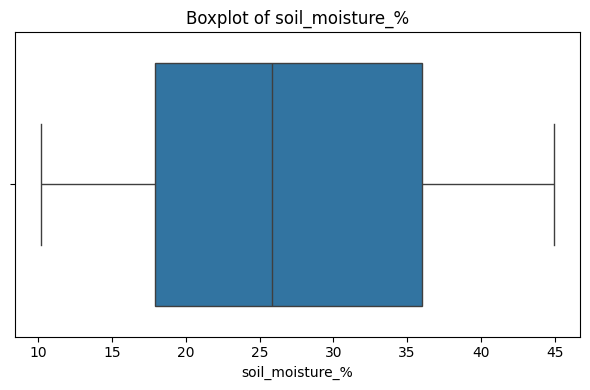

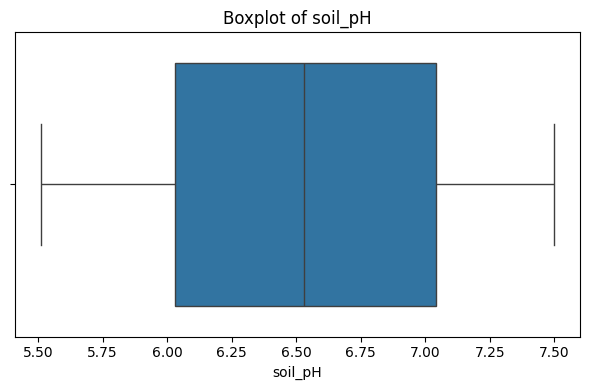

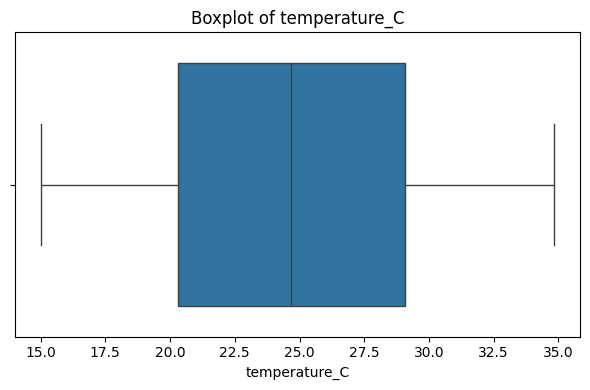

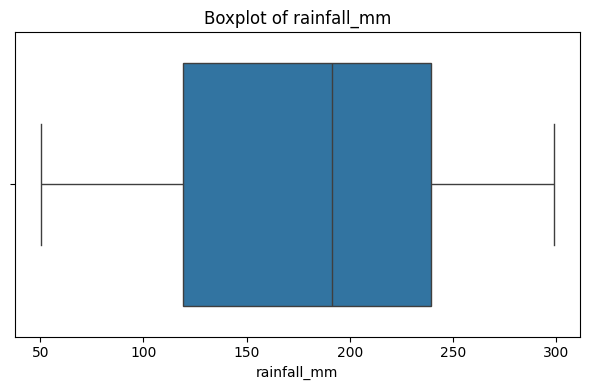

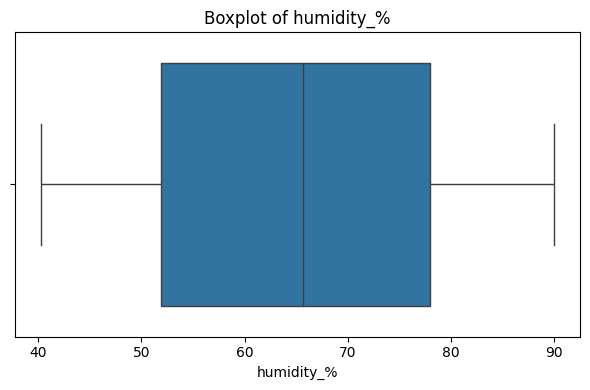

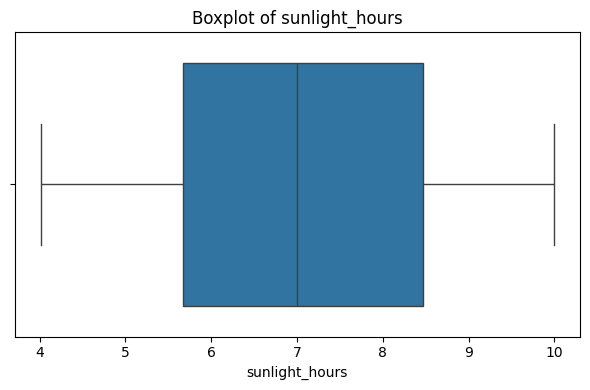

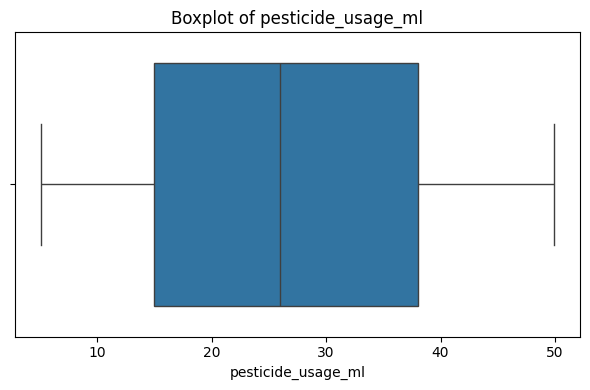

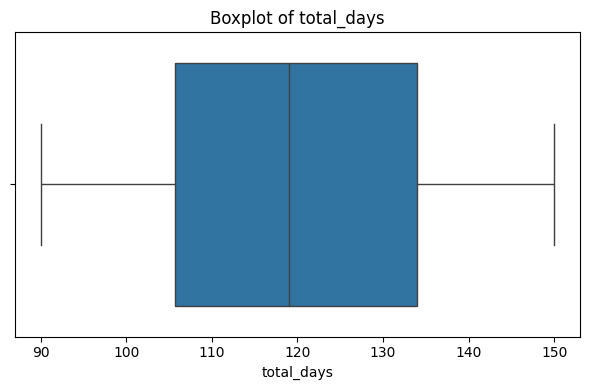

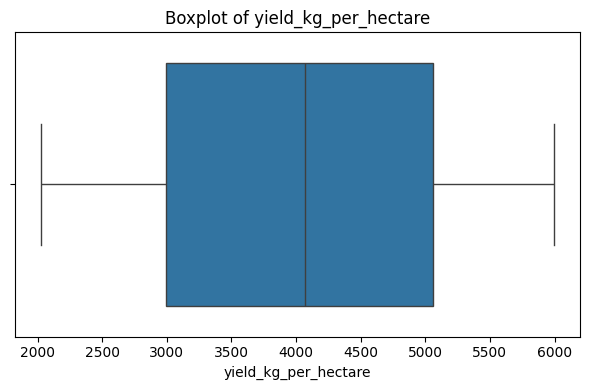

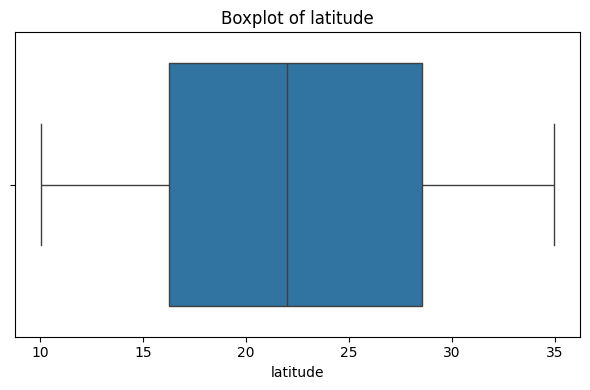

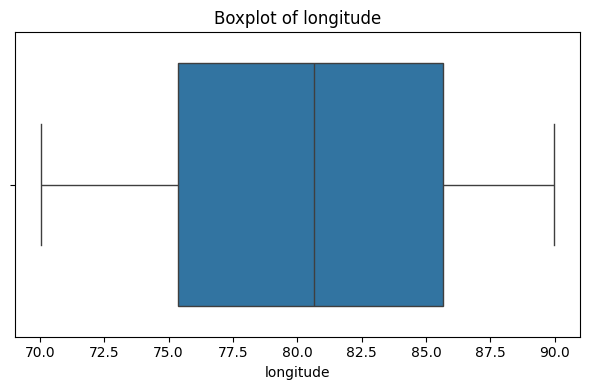

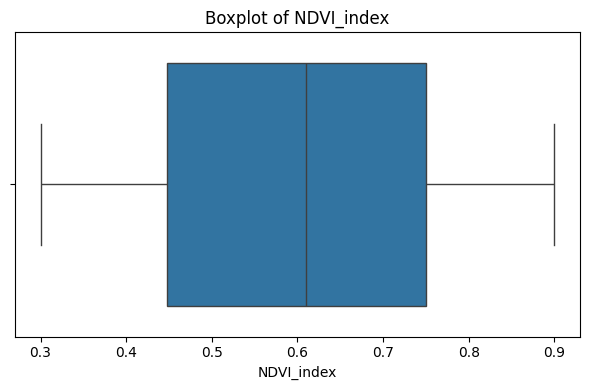

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()



Standardize numerical features for modeling

In [136]:
df

,farm_id,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,...,sowing_date,harvest_date,total_days,yield_kg_per_hectare,sensor_id,timestamp,latitude,longitude,NDVI_index,crop_disease_status
0,FARM0001,North India,Wheat,35.95,5.99,17.79,75.62,77.03,7.27,Manual,...,2024-01-08,2024-05-09,122,4408.07,SENS0001,2024-03-19,14.970941,82.997689,0.63,Mild
1,FARM0002,South USA,Soybean,19.74,7.24,30.18,89.91,61.13,5.67,Sprinkler,...,2024-02-04,2024-05-26,112,5389.98,SENS0002,2024-04-21,16.613022,70.869009,0.58,Severe
2,FARM0003,South USA,Wheat,29.32,7.16,27.37,265.43,68.87,8.23,Drip,...,2024-02-03,2024-06-26,144,2931.16,SENS0003,2024-02-28,19.503156,79.068206,0.80,Mild
3,FARM0004,Central USA,Maize,17.33,6.03,33.73,212.01,70.46,5.03,Sprinkler,...,2024-02-21,2024-07-04,134,4227.80,SENS0004,2024-05-14,31.071298,85.519998,0.44,Moderate
4,FARM0005,Central USA,Cotton,19.37,5.92,33.86,269.09,55.73,7.93,Manual,...,2024-02-05,2024-05-20,105,4979.96,SENS0005,2024-04-13,16.568540,81.691720,0.84,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,FARM0496,Central USA,Rice,42.85,6.70,30.85,52.35,79.58,7.25,Manual,...,2024-01-16,2024-06-02,138,4251.40,SENS0496,2024-05-08,30.386623,76.147700,0.59,Mild
496,FARM0497,North India,Soybean,34.22,6.75,17.46,256.23,45.14,5.78,Sprinkler,...,2024-01-01,2024-04-14,104,3708.54,SENS0497,2024-01-19,18.832748,75.736924,0.85,Severe
497,FARM0498,North India,Cotton,15.93,5.72,17.03,288.96,57.87,7.69,Drip,...,2024-01-02,2024-05-09,128,2604.41,SENS0498,2024-04-20,23.262016,81.992230,0.71,Mild
498,FARM0499,Central USA,Soybean,38.61,6.20,17.08,279.06,73.09,9.60,Drip,...,2024-01-25,2024-06-04,131,2586.36,SENS0499,2024-03-02,19.764989,84.426869,0.77,Severe


In [137]:
df_2 = df.copy()

In [138]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include='number').columns
df_2[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [139]:
df_2

,farm_id,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,...,sowing_date,harvest_date,total_days,yield_kg_per_hectare,sensor_id,timestamp,latitude,longitude,NDVI_index,crop_disease_status
0,FARM0001,North India,Wheat,0.907293,-0.912829,-1.288608,-1.468632,0.809091,0.141931,Manual,...,2024-01-08,2024-05-09,0.149214,0.319745,SENS0001,2024-03-19,-1.026845,0.441245,0.159451,Mild
1,FARM0002,South USA,Soybean,-0.691342,1.224023,1.030076,-1.270767,-0.277851,-0.804827,Sprinkler,...,2024-02-04,2024-05-26,-0.446689,1.156654,SENS0002,2024-04-21,-0.801166,-1.612810,-0.125894,Severe
2,FARM0003,South USA,Wheat,0.253440,1.087265,0.504208,1.159559,0.251264,0.709986,Drip,...,2024-02-03,2024-06-26,1.460202,-0.939066,SENS0003,2024-02-28,-0.403963,-0.224233,1.129623,Mild
3,FARM0004,Central USA,Maize,-0.929017,-0.844450,1.694429,0.419883,0.359958,-1.183530,Sprinkler,...,2024-02-21,2024-07-04,0.864299,0.166096,SENS0004,2024-05-14,1.185896,0.868411,-0.924860,Moderate
4,FARM0005,Central USA,Cotton,-0.727832,-1.032493,1.718757,1.210237,-0.647001,0.532468,Manual,...,2024-02-05,2024-05-20,-0.863822,0.807182,SENS0005,2024-04-13,-0.807280,0.220072,1.357899,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,FARM0496,Central USA,Rice,1.587773,0.300903,1.155461,-1.790839,0.983412,0.130096,Manual,...,2024-01-16,2024-06-02,1.102660,0.186211,SENS0496,2024-05-08,1.091799,-0.718836,-0.068825,Mild
496,FARM0497,North India,Soybean,0.736680,0.386377,-1.350365,1.032172,-1.370945,-0.739737,Sprinkler,...,2024-01-01,2024-04-14,-0.923412,-0.276484,SENS0497,2024-01-19,-0.496100,-0.788403,1.414968,Severe
497,FARM0498,North India,Cotton,-1.067086,-1.374390,-1.430836,1.485366,-0.500708,0.390455,Drip,...,2024-01-02,2024-05-09,0.506756,-1.217564,SENS0498,2024-04-20,0.112633,0.270965,0.616002,Mild
498,FARM0499,Central USA,Soybean,1.169623,-0.553838,-1.421479,1.348286,0.539748,1.520647,Drip,...,2024-01-25,2024-06-04,0.685527,-1.232949,SENS0499,2024-03-02,-0.367978,0.683284,0.958416,Severe


In [141]:
df.to_csv(r'D:\Test Project\Smart Farming Project\data\raw\cleaned_data.csv', index=False)

### EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cleaned_df = pd.read_csv(r'D:\Test Project\Smart Farming Project\data\raw\cleaned_data.csv')

In [6]:
date_cols = ['sowing_date', 'harvest_date','timestamp']
for col in date_cols:
    cleaned_df[col] = pd.to_datetime(cleaned_df[col], errors='coerce')

In [8]:
sns.set(style="whitegrid")

#### Univariate Analysis - Numerical Features

In [9]:
num_cols = cleaned_df.select_dtypes(include='number').columns

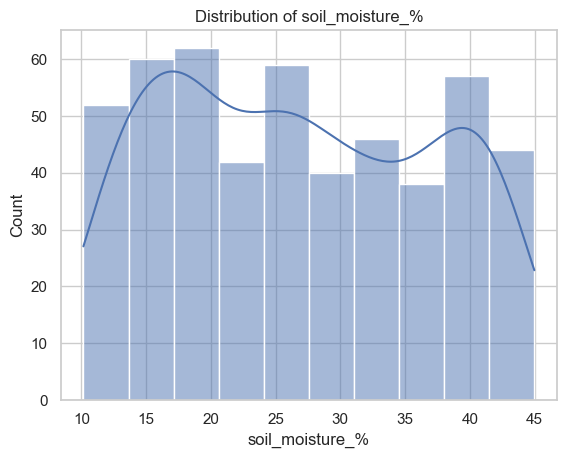

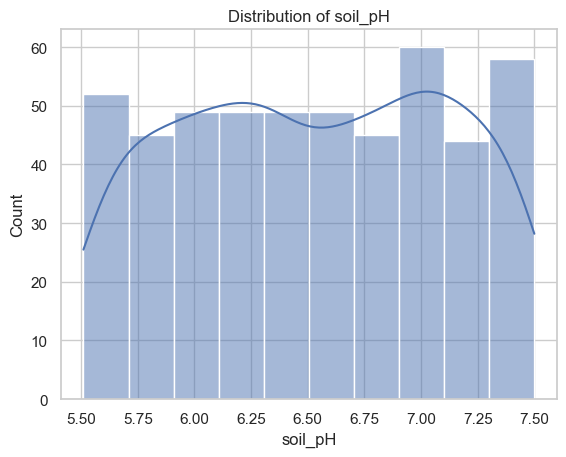

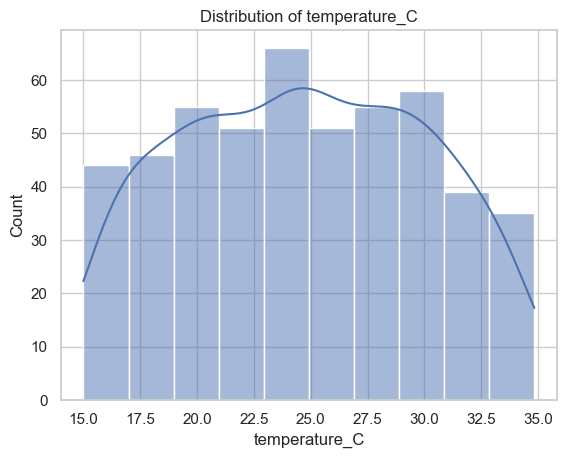

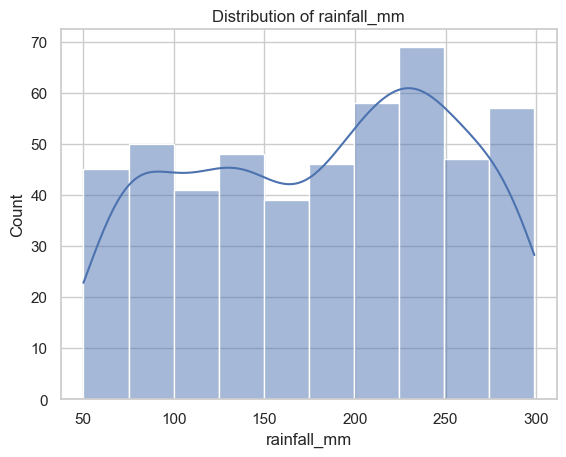

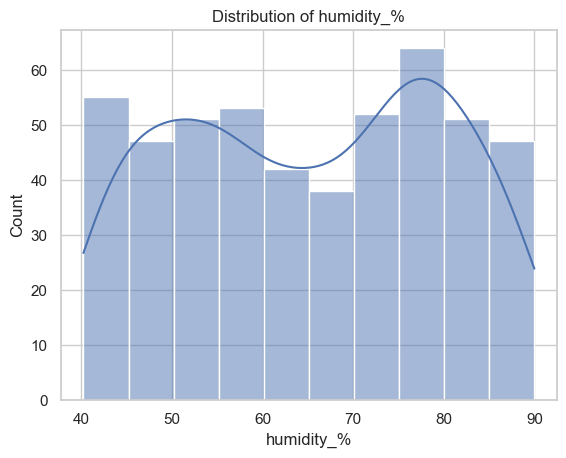

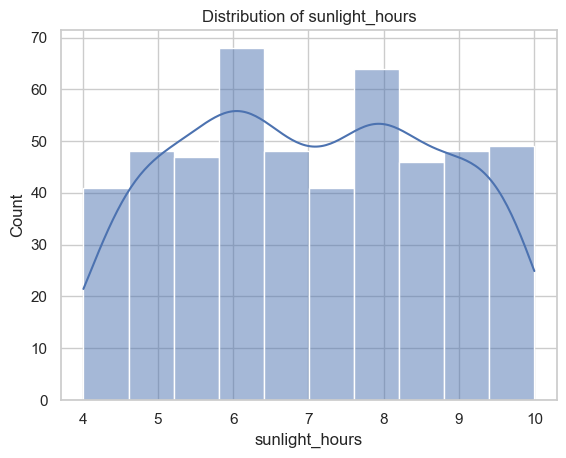

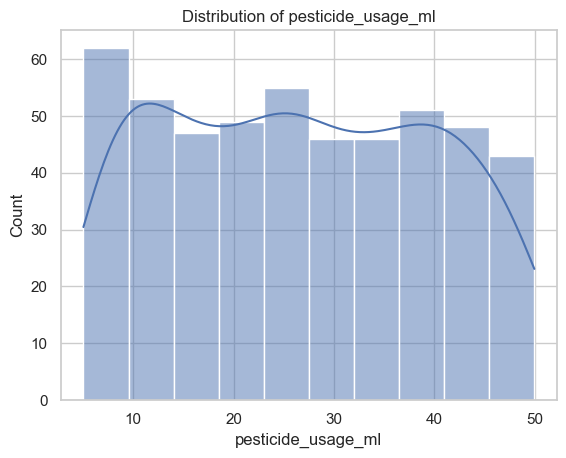

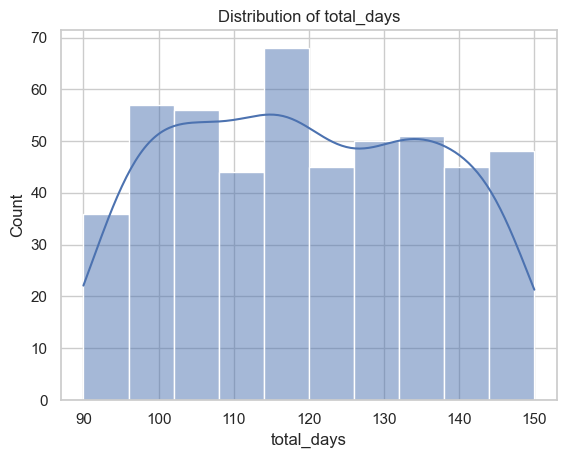

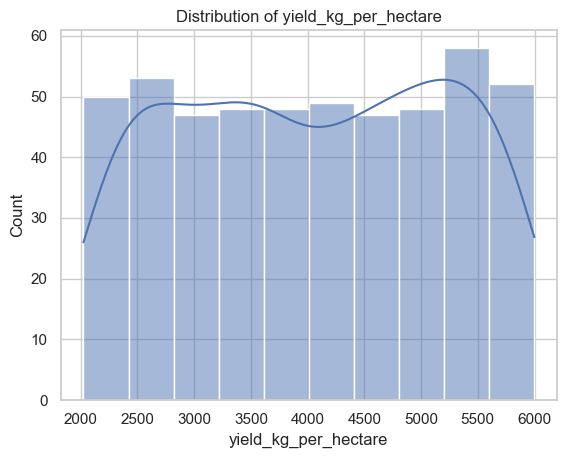

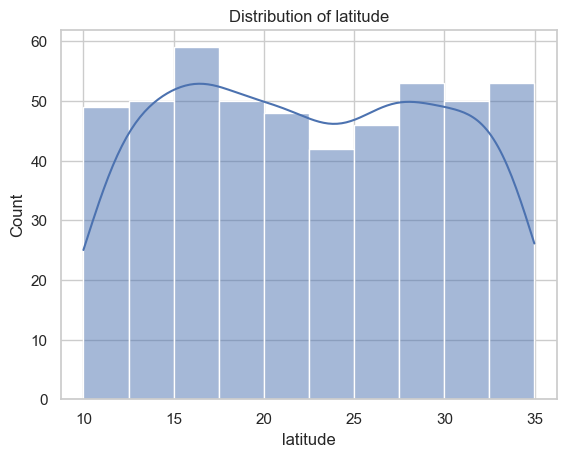

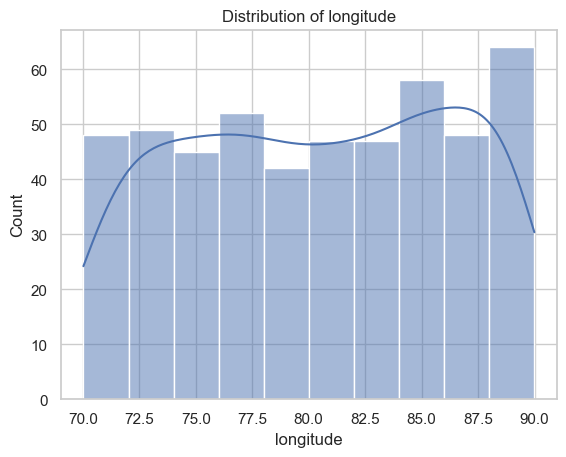

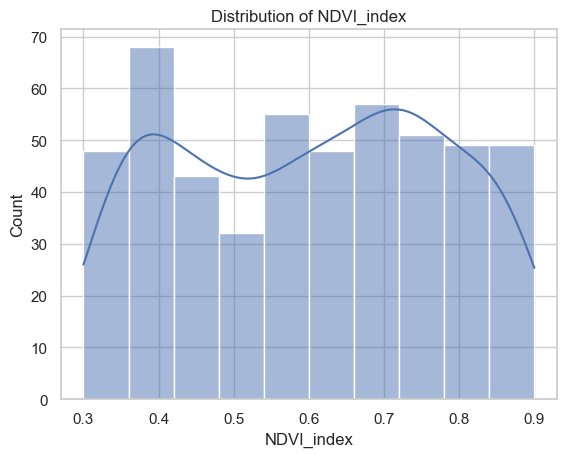

In [10]:
for col in num_cols:
    plt.Figure(figsize=(6,4))
    sns.histplot(cleaned_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

#### Categorical Feature Count

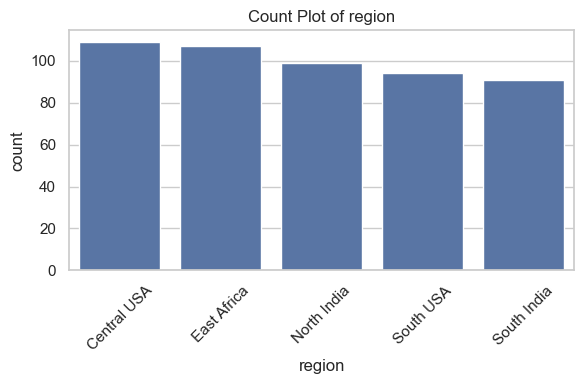

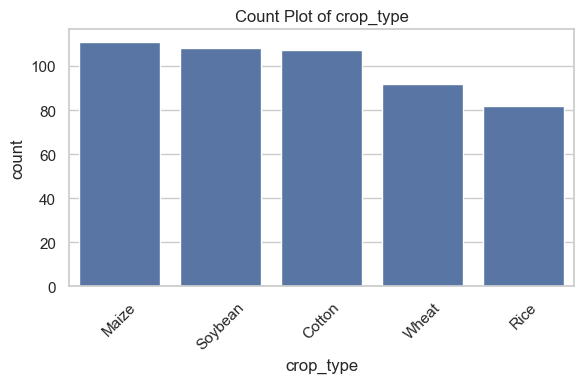

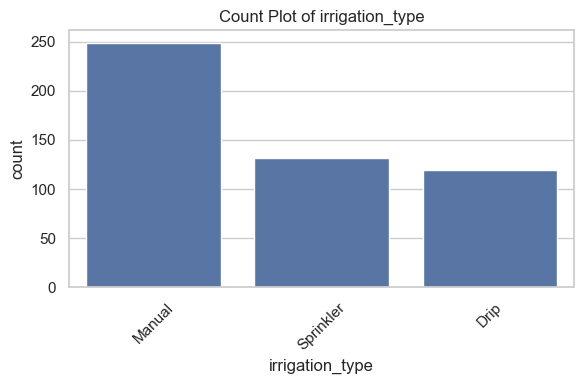

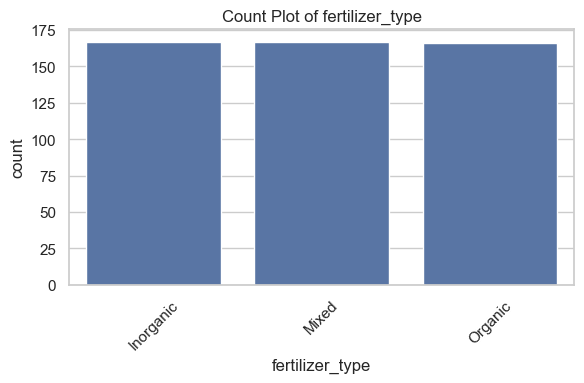

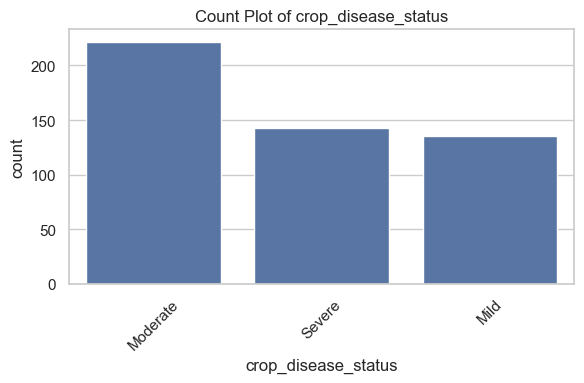

In [14]:
cat_cols_only = cleaned_df.select_dtypes(include='object')

cols_to_drop = [col for col in ['farm_id', 'sensor_id'] if col in cat_cols_only.columns]
cat_cols = cat_cols_only.drop(columns=cols_to_drop).columns

# Plot count plots
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=cleaned_df, x=col, order=cleaned_df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#### Correlation heatmap

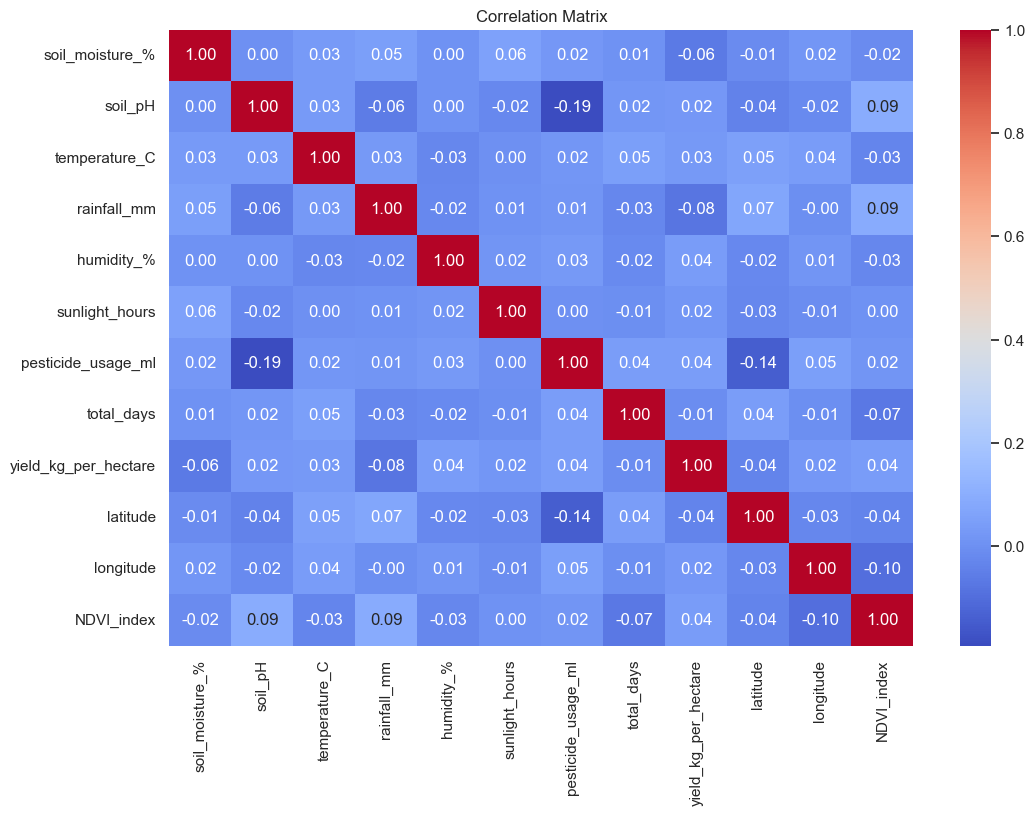

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(cleaned_df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


#### Pairplot for Main Features

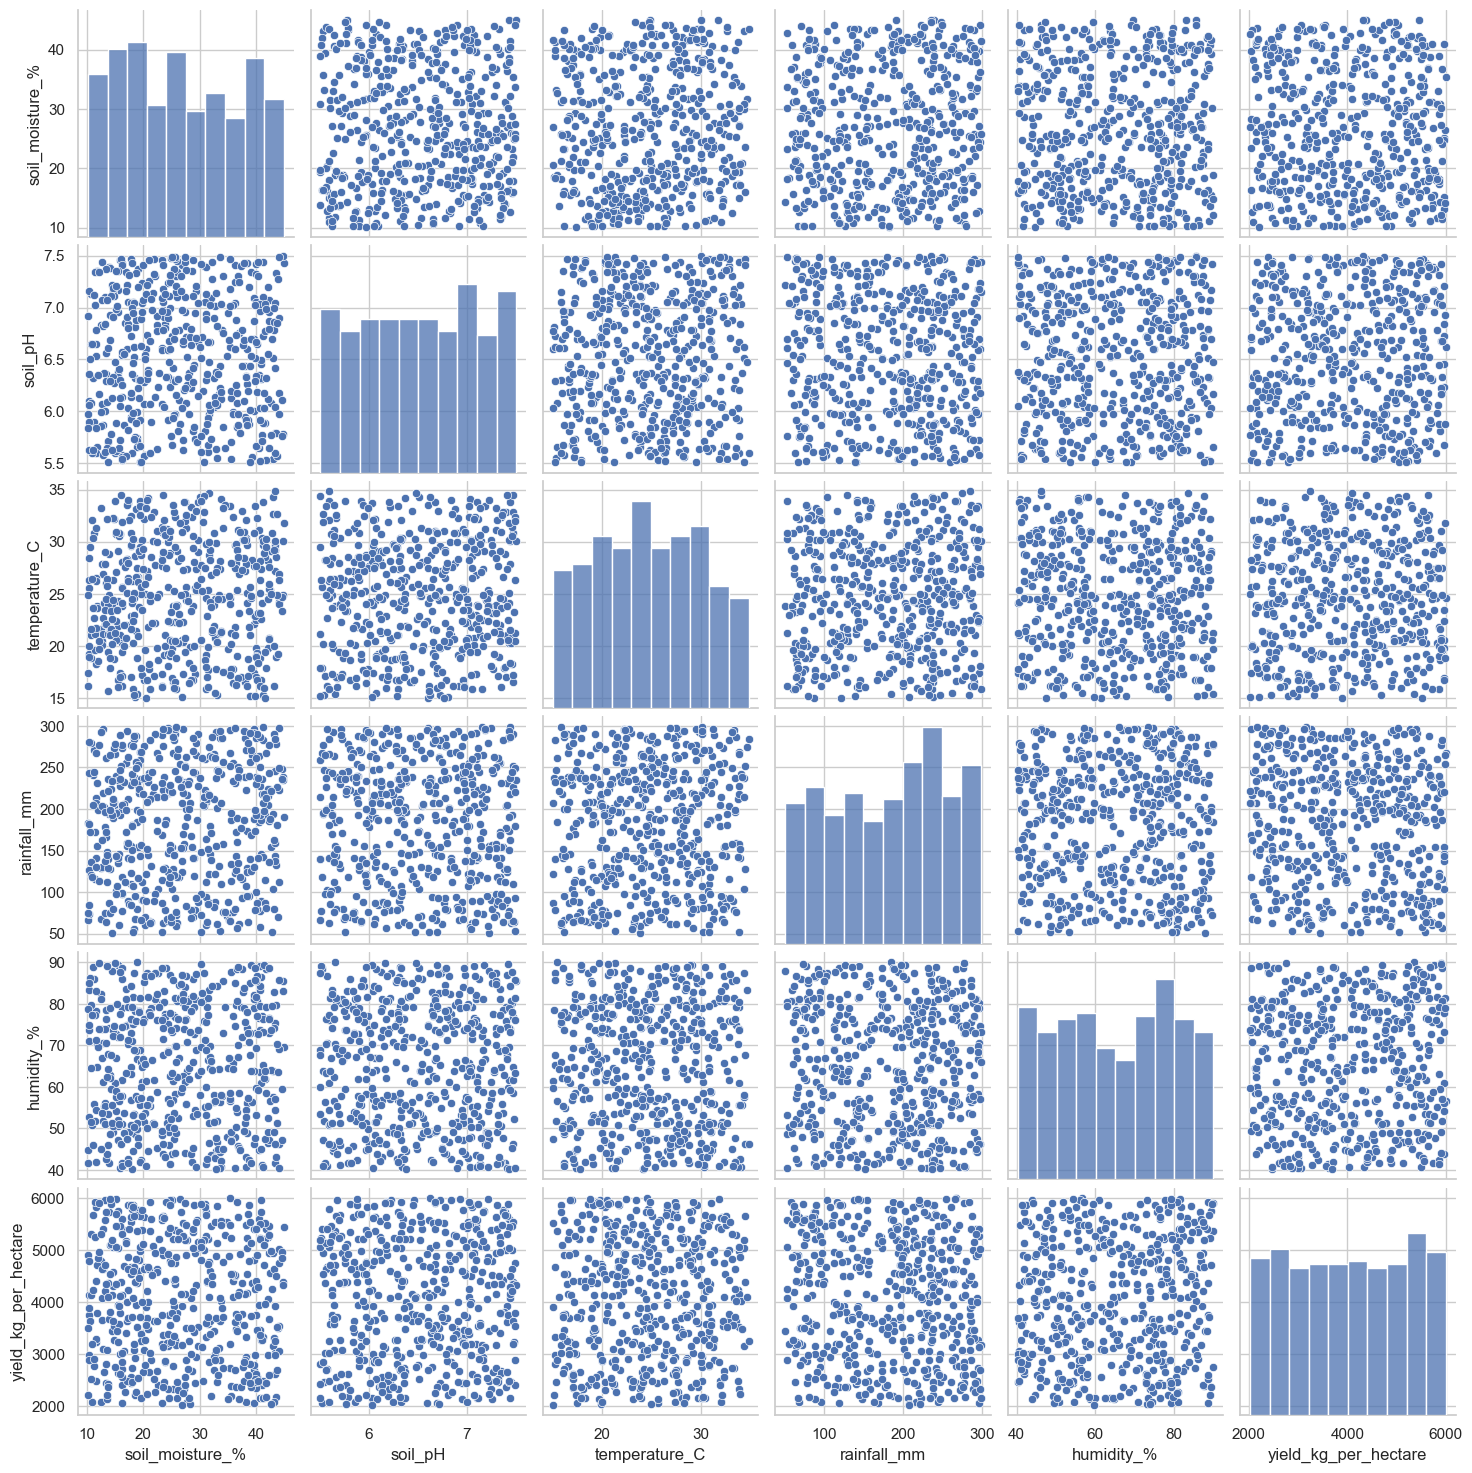

In [16]:
sns.pairplot(cleaned_df[['soil_moisture_%', 'soil_pH', 'temperature_C', 'rainfall_mm', 'humidity_%', 'yield_kg_per_hectare']])
plt.show()


#### Target Variable Analysis by Category

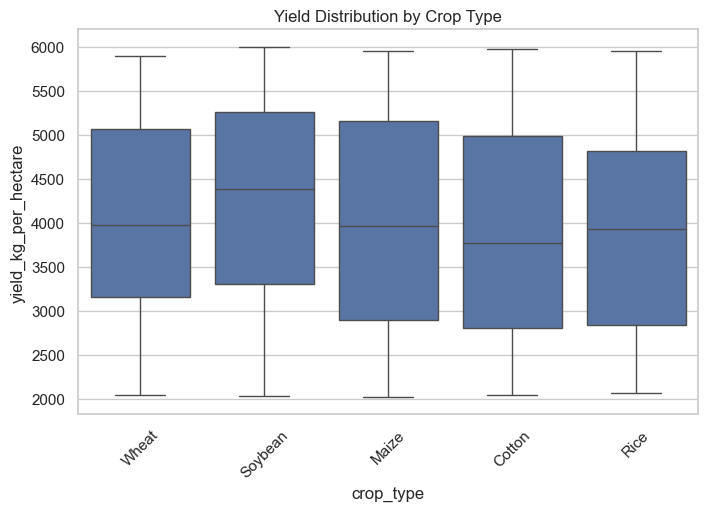

In [17]:
#Yield by Crop Type

plt.figure(figsize=(8, 5))
sns.boxplot(data=cleaned_df, x='crop_type', y='yield_kg_per_hectare')
plt.xticks(rotation=45)
plt.title('Yield Distribution by Crop Type')
plt.show()


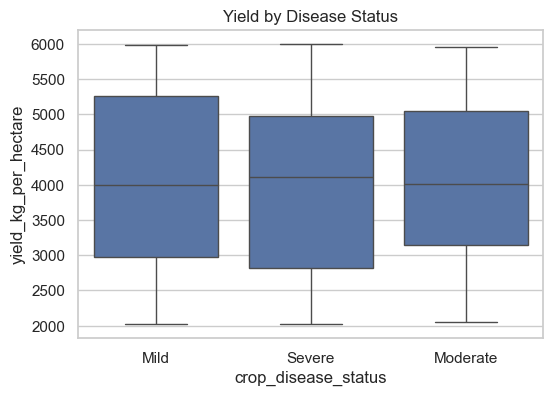

In [18]:
#Yield By Disease Status

plt.figure(figsize=(6, 4))
sns.boxplot(data=cleaned_df, x='crop_disease_status', y='yield_kg_per_hectare')
plt.title('Yield by Disease Status')
plt.show()


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def binned_yield_analysis(df, feature, bins=5):
    bin_col = f'{feature}_bin'
    df[bin_col] = pd.cut(df[feature], bins=bins)

    plt.figure(figsize=(8, 5))
    #sns.boxplot(x=bin_col, y='yield_kg_per_hectare', data=df)
    sns.violinplot(x=bin_col, y='yield_kg_per_hectare', data=df, inner='box')
    plt.xticks(rotation=45)
    plt.title(f'Yield Distribution by Binned {feature}')
    plt.xlabel(f'{feature} Range')
    plt.ylabel('Yield (kg per hectare)')
    plt.tight_layout()
    plt.show()


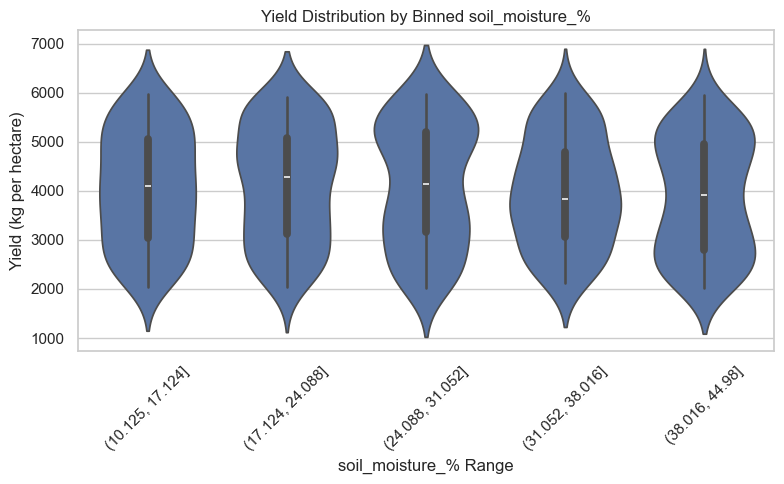

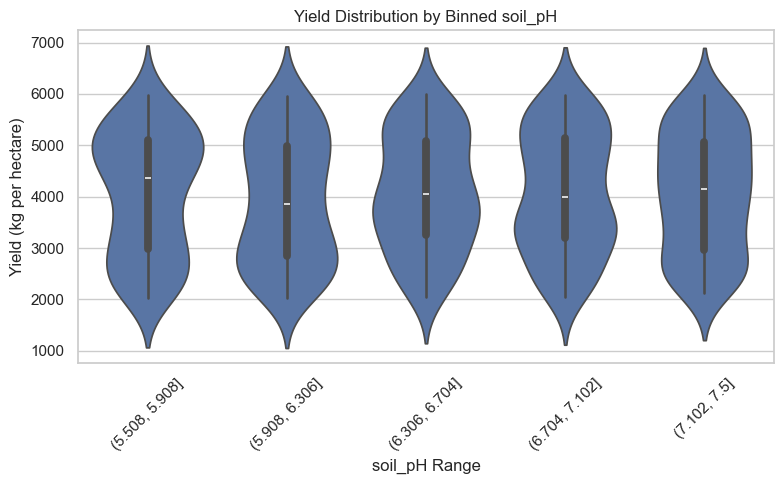

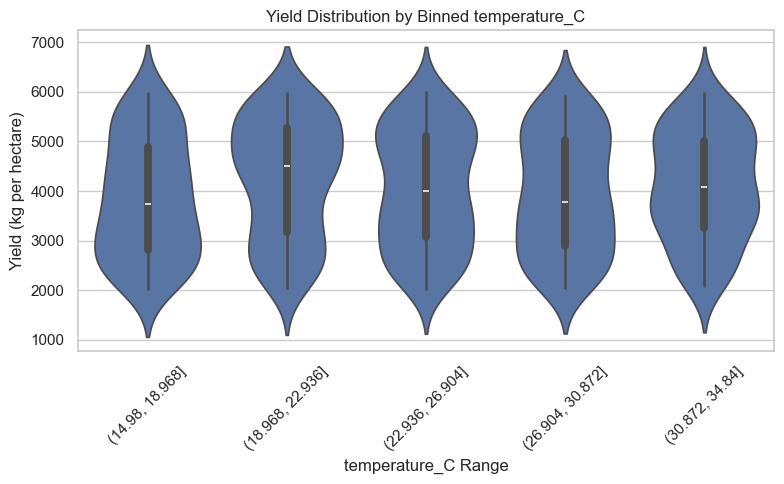

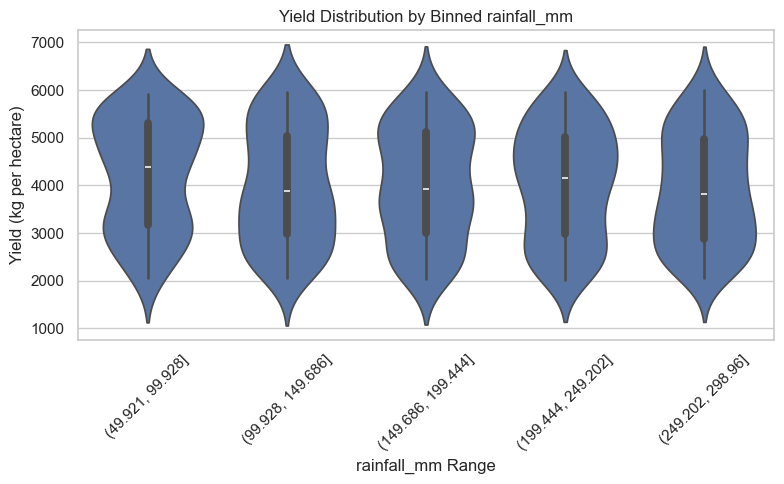

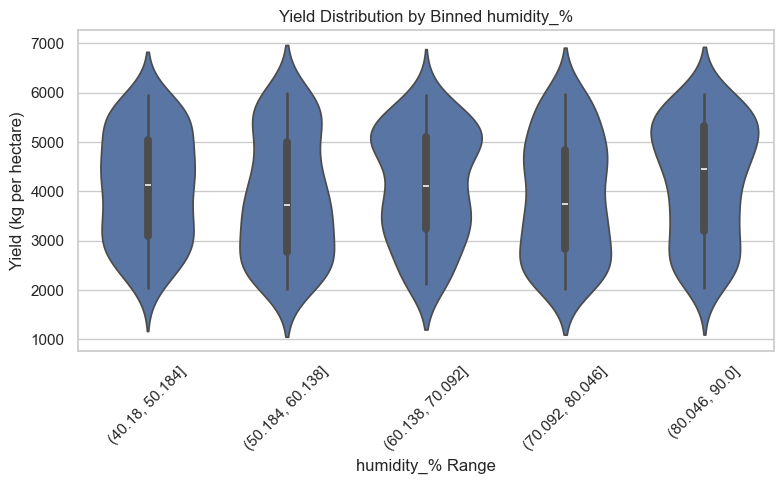

In [30]:
features_to_analyze = ['soil_moisture_%', 'soil_pH', 'temperature_C', 'rainfall_mm', 'humidity_%']

for feature in features_to_analyze:
    binned_yield_analysis(cleaned_df.copy(), feature, bins=5)


In [31]:
def barplot_mean_yield_by_bin(df, feature, bins=5):
    bin_col = f'{feature}_bin'
    df[bin_col] = pd.cut(df[feature], bins=bins)
    
    mean_yield = df.groupby(bin_col)['yield_kg_per_hectare'].mean().reset_index()

    plt.figure(figsize=(8, 4))
    sns.barplot(x=bin_col, y='yield_kg_per_hectare', data=mean_yield)
    plt.xticks(rotation=45)
    plt.title(f'Mean Yield by {feature} Bins')
    plt.xlabel(f'{feature} Range')
    plt.ylabel('Mean Yield')
    plt.tight_layout()
    plt.show()


C:\Users\Ravindu\AppData\Local\Temp\ipykernel_18004\312761132.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_yield = df.groupby(bin_col)['yield_kg_per_hectare'].mean().reset_index()


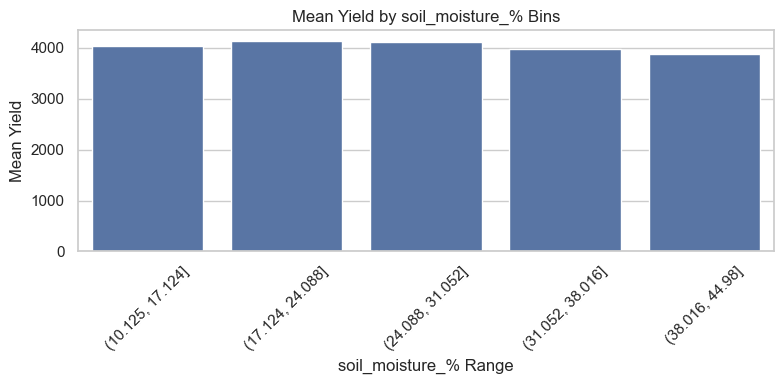

C:\Users\Ravindu\AppData\Local\Temp\ipykernel_18004\312761132.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_yield = df.groupby(bin_col)['yield_kg_per_hectare'].mean().reset_index()


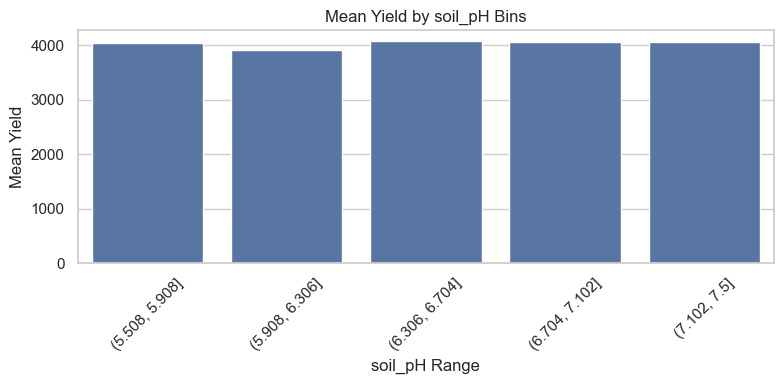

C:\Users\Ravindu\AppData\Local\Temp\ipykernel_18004\312761132.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_yield = df.groupby(bin_col)['yield_kg_per_hectare'].mean().reset_index()


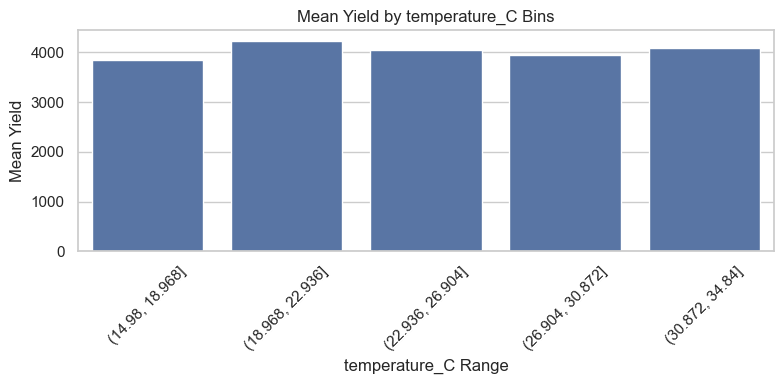

C:\Users\Ravindu\AppData\Local\Temp\ipykernel_18004\312761132.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_yield = df.groupby(bin_col)['yield_kg_per_hectare'].mean().reset_index()


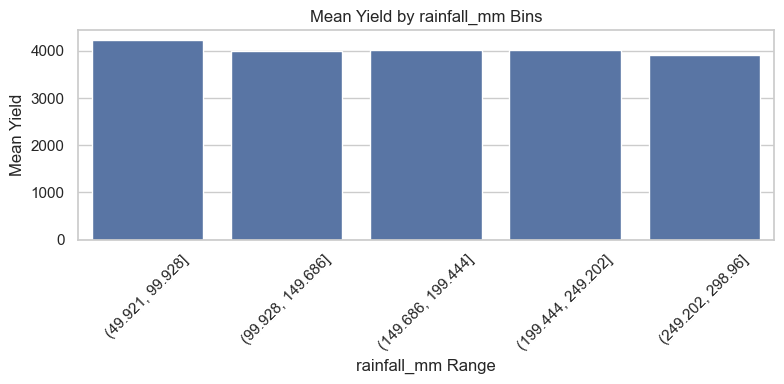

C:\Users\Ravindu\AppData\Local\Temp\ipykernel_18004\312761132.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_yield = df.groupby(bin_col)['yield_kg_per_hectare'].mean().reset_index()


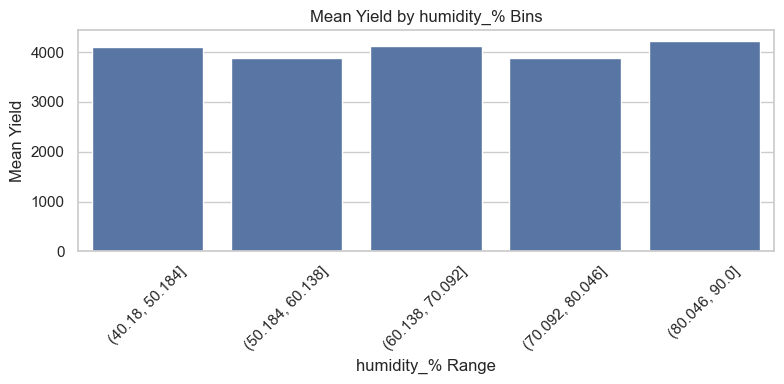

In [32]:
for feature in features_to_analyze:
    barplot_mean_yield_by_bin(cleaned_df.copy(), feature)


#### Time Series Plots

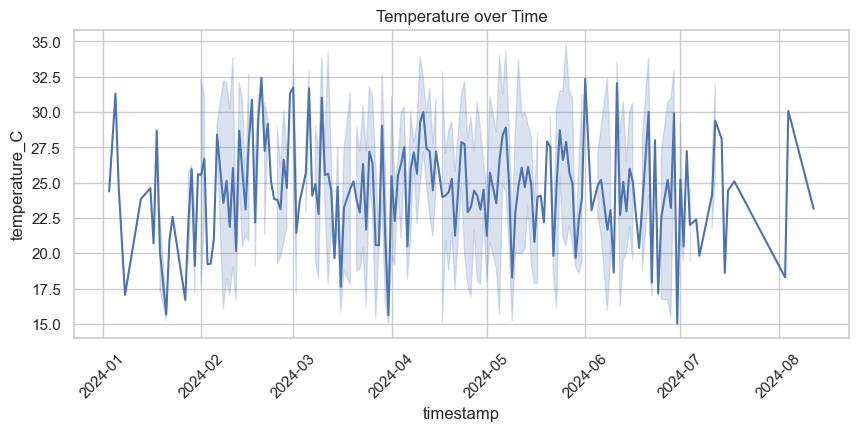

In [19]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=cleaned_df, x='timestamp', y='temperature_C')
plt.title('Temperature over Time')
plt.xticks(rotation=45)
plt.show()


#### 

#### Data Pre-Processing

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [35]:
df_3 = cleaned_df.copy()

# 1️⃣ Create a new feature: growing duration in days
df_3['growing_duration'] = (df_3['harvest_date'] - df_3['sowing_date']).dt.days

In [36]:
df_3.drop(columns=['sowing_date', 'harvest_date', 'timestamp'], inplace=True)

In [37]:
categorical_cols_2 = df_3.select_dtypes(include=['object']).columns.tolist()
numerical_cols_2 = df_3.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [38]:
if 'yield_kg_per_hectare' in categorical_cols_2:
    categorical_cols.remove('yield_kg_per_hectare')
if 'growing_duration' in categorical_cols_2:
    categorical_cols.remove('growing_duration')

In [39]:
label_encoders = {}
for col in categorical_cols_2:
    le = LabelEncoder()
    df_3[col] = le.fit_transform(df_3[col])
    label_encoders[col] = le

In [40]:
scaler = StandardScaler()
df_3[numerical_cols_2] = scaler.fit_transform(df_3[numerical_cols_2])

In [41]:
df_3.to_csv(r'D:\Test Project\Smart Farming Project\data\raw\preprocessed_data.csv', index=False)